In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from datetime import datetime

pd.set_option('display.max_colwidth', None)
%matplotlib inline

df = pd.read_csv('data/listings/listings_merged.csv')

## According to a Times Opinion analysis, Live Auctioneers has published more than 25,000 listings for Nazi memorabilia.
More than 2,000 of those listings were published last year.

In [157]:
df['date'] = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
print(len(df), df[df.year == 2022].year.count())

26617 2303


## Which listings sold for the most money to LiveAuctioneers bidders?
(The highest sale price for a LA auction that went to a non-LA bidder was Hitler's telephone, for $200,000)

In [152]:
df[df.final_bidder == 'Internet Bid'].sort_values('price', ascending = False).head(5)

,title,date,price,cats,final_bidder,auctioneer,img,url,auctioneer_url,lat,lng,state,city,zip,address,auctions
20134,WWII GERMAN WEHRMACHT VON BOCK FIELD MARSHAL BATON,2018-08-23,21000.0,Home & Décor,Internet Bid,Affiliated Auctions,https://p1.liveauctioneers.com/368/125854/64027183_1_x.jpg?quality=80&version=1533326623,https://www.liveauctioneers.com/item/64027183_wwii-german-wehrmacht-von-bock-field-marshal-baton,https://www.liveauctioneers.com/auctioneer/368/affiliated-auctions/,30.4289,-84.2395,FL,Tallahassee,32301,2500 Apalachee Parkway,458.0
10254,WWII NAZI GERMAN WAFFEN SS NAMED DAMASCUS SWORD,2022-08-27,17500.0,NaN,Internet Bid,Milestone Auctions,https://p1.liveauctioneers.com/3324/256449/133386260_1_x.jpg?quality=80&version=1659041569,https://www.liveauctioneers.com/item/133386260_wwii-nazi-german-waffen-ss-named-damascus-sword,https://www.liveauctioneers.com/auctioneer/3324/milestone-auctions/,41.6774,-81.4062,OH,Willoughby,44094,38198 Willoughby Parkway,194.0
19557,WWII GERMAN CAPTURED INFANTRY BATTALION STANDARTE,2018-01-27,13500.0,"Collectibles > Coins, Currency & Stamps",Internet Bid,Milestone Auctions,https://p1.liveauctioneers.com/3324/114643/58862785_1_x.jpg?quality=80&version=1514628749,https://www.liveauctioneers.com/item/58862785_wwii-german-captured-infantry-battalion-standarte,https://www.liveauctioneers.com/auctioneer/3324/milestone-auctions/,41.6774,-81.4062,OH,Willoughby,44094,38198 Willoughby Parkway,194.0
19521,EXTREMELY RARE GERMAN WW II FAMOUS,2018-01-13,8500.0,NaN,Internet Bid,"Dotta Auction Co., Inc",https://p1.liveauctioneers.com/840/114438/58774493_1_x.jpg?quality=80&version=1514505217,https://www.liveauctioneers.com/item/58774493_extremely-rare-german-ww-ii-famous,https://www.liveauctioneers.com/auctioneer/840/dotta-auction-co-inc/,40.8022,-75.3465,PA,Nazareth,18064,330 W. Moorestown Road,54.0
3582,DEUTSCHLAND ERWACHE THIRD REICH NAZI STANDARD FLAG,2016-04-09,8500.0,Collectibles,Internet Bid,Lemar Auctions and Estate Services,https://p1.liveauctioneers.com/3807/87122/44706470_1_x.jpg?quality=80&version=1459701686,https://www.liveauctioneers.com/item/44706470_deutschland-erwache-third-reich-nazi-standard-flag,https://www.liveauctioneers.com/auctioneer/3807/lemar-auctions-and-estate-services/,38.6489,-121.4170,CA,McClellan,95652,4522 Parker Avenue Suite 500,64.0


## Has the number of Nazi listings changed over time?
Not sure if there's a trend here tbh except to say that the number of listings has been increasing in recent years. Wonder what's behind the 2016 dip.

<Axes: xlabel='year', ylabel='count'>

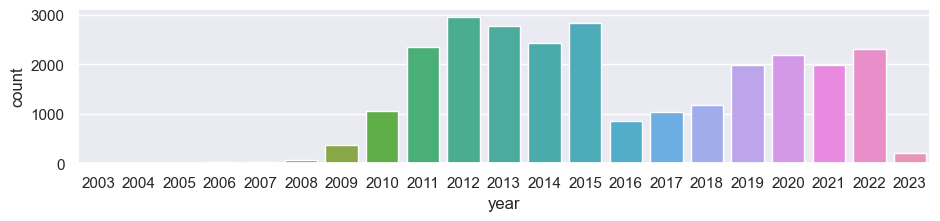

In [53]:
# Listings per year
sns.set(rc={'figure.figsize':(11,2)})
sns.countplot(data=df, x="year")

## Which auctioneers listed the most items?

In [68]:
top10 = pd.DataFrame(df.groupby('auctioneer').count().sort_values('title', ascending = False).head(10).title)
auctioneers = df.groupby('auctioneer').first()[['auctioneer_url', 'lat', 'lng', 'address', 'city', 'zip', 'state']]
top10.join(auctioneers).rename(columns={"title": "nazi_listings"})

,nazi_listings,auctioneer_url,lat,lng,address,city,zip,state
auctioneer,,,,,,,,
Affiliated Auctions,4791,https://www.liveauctioneers.com/auctioneer/368/affiliated-auctions/,30.428900,-84.239500,2500 Apalachee Parkway,Tallahassee,32301,FL
Pioneer Auction Gallery,4465,https://www.liveauctioneers.com/auctioneer/1056/pioneer-auction-gallery/,45.416900,-122.642000,10824 SE Oak Street Suite 177,Portland,97222,OR
Universal Live,3804,https://www.liveauctioneers.com/auctioneer/1011/universal-live/,42.121927,-87.839958,3005 Commercial,Northbrook,60062,IL
Milestone Auctions,3047,https://www.liveauctioneers.com/auctioneer/3324/milestone-auctions/,41.677400,-81.406200,38198 Willoughby Parkway,Willoughby,44094,OH
Rare Treasures,1592,https://www.liveauctioneers.com/auctioneer/6202/rare-treasures/,40.292000,-76.807200,7 Rutherford Rd.,Harrisburg,17109,PA
Alexander Historical Auctions LLC,1139,https://www.liveauctioneers.com/auctioneer/287/alexander-historical-auctions-llc/,39.527300,-75.812100,98 Bohemia Avenue Suite Two,Chesapeake City,21915,MD
Valkyrie Historical Auctions,776,https://www.liveauctioneers.com/auctioneer/7031/valkyrie-historical-auctions/,33.309200,-111.821000,None,Chandler,85225,AZ
Mohawk Arms Inc.,657,https://www.liveauctioneers.com/auctioneer/1022/mohawk-arms-inc/,42.365700,-97.560800,6819 U.S. 20 PO Box 157,Bouckville,13310,NY
Martin Auction Co.,412,https://www.liveauctioneers.com/auctioneer/1225/martin-auction-co/,37.464500,-89.222800,100 Lick Creek Road PO Box 2,Anna,62906,IL


## Which auctioneers sold the most listings by $ value?
Milestone Auctions co-owner Miles King: "The dagger was the shocker of the day, pricewise, but all of the German World War II material was strong. It always is, and in my opinion, the category has never been stronger than it is now, especially the very rare items."

https://www.prnewswire.com/news-releases/milestone-auctions-celebrates-first-million-dollar-sale-at-jan-19-auction-of-historical-militaria--firearms-300792642.html

In [76]:
top10 = pd.DataFrame(df.groupby('auctioneer').sum('price').sort_values('price', ascending = False).head(10).price)
auctioneers = df.groupby('auctioneer').first()[['auctioneer_url', 'lat', 'lng', 'address', 'city', 'zip', 'state']]
top10.join(auctioneers).rename(columns={"price": "nazi_listings_$"})

,nazi_listings_$,auctioneer_url,lat,lng,address,city,zip,state
auctioneer,,,,,,,,
Milestone Auctions,1488585.0,https://www.liveauctioneers.com/auctioneer/3324/milestone-auctions/,41.677400,-81.406200,38198 Willoughby Parkway,Willoughby,44094,OH
Affiliated Auctions,1089516.0,https://www.liveauctioneers.com/auctioneer/368/affiliated-auctions/,30.428900,-84.239500,2500 Apalachee Parkway,Tallahassee,32301,FL
Alexander Historical Auctions LLC,549390.0,https://www.liveauctioneers.com/auctioneer/287/alexander-historical-auctions-llc/,39.527300,-75.812100,98 Bohemia Avenue Suite Two,Chesapeake City,21915,MD
Pioneer Auction Gallery,448240.0,https://www.liveauctioneers.com/auctioneer/1056/pioneer-auction-gallery/,45.416900,-122.642000,10824 SE Oak Street Suite 177,Portland,97222,OR
Rare Treasures,258578.0,https://www.liveauctioneers.com/auctioneer/6202/rare-treasures/,40.292000,-76.807200,7 Rutherford Rd.,Harrisburg,17109,PA
Valkyrie Historical Auctions,153485.0,https://www.liveauctioneers.com/auctioneer/7031/valkyrie-historical-auctions/,33.309200,-111.821000,None,Chandler,85225,AZ
Rock Island Auction,143240.0,https://www.liveauctioneers.com/auctioneer/1125/rock-island-auction/,41.443200,-90.625000,7819 42nd Street W,Rock Island,61201,IL
Dan Morphy Auctions,141440.0,https://www.liveauctioneers.com/auctioneer/249/dan-morphy-auctions/,40.220400,-76.101700,2000 N Reading Road,Denver,17517,PA
Universal Live,138323.0,https://www.liveauctioneers.com/auctioneer/1011/universal-live/,42.121927,-87.839958,3005 Commercial,Northbrook,60062,IL


## LiveAuctioneers bidders have spent more than $2 million on Nazi memorabilia.

In [81]:
# How much money have LiveAuctioneers bidders spent on Nazi memorabilia?
top10 = pd.DataFrame(df[df.final_bidder == 'Internet Bid'].groupby('auctioneer').sum('price').sort_values('price', ascending = False).price)
auctioneers = df.groupby('auctioneer').first()[['auctioneer_url', 'lat', 'lng', 'address', 'city', 'zip', 'state']]
top10.join(auctioneers).price.sum()

2055098.0

## What kind of items are being sold?

In [149]:
df[['cat1', 'cat2', 'cat3', 'cat4', 'cat5']] = df.cats.str.split(pat = ' > ', expand=True)
df.groupby(['cat1', 'cat2', 'cat3', 'cat4', 'cat5'], dropna = False).count().sort_values('title', ascending = False)
cat1to2 = df.groupby(['cat1', 'cat2'], dropna = False).count().sort_values('title', ascending = False)
cat2to3 = df.groupby(['cat2', 'cat3'], dropna = False).count().sort_values('title', ascending = False)
cat3to4 = df.groupby(['cat3', 'cat4'], dropna = False).count().sort_values('title', ascending = False)
cat4to5 = df.groupby(['cat4', 'cat5'], dropna = False).count().sort_values('title', ascending = False)

# Filter out terminal nodes except from first
cat1to2 = cat1to2[~cat1to2.index.isin([np.nan], level=0)]
cat2to3 = cat2to3[~cat2to3.index.isin([np.nan], level=1)]
cat3to4 = cat3to4[~cat3to4.index.isin([np.nan], level=1)]
cat4to5 = cat4to5[~cat4to5.index.isin([np.nan], level=1)]


pairs = pd.DataFrame(pd.concat([cat1to2, cat2to3, cat3to4, cat4to5]).rename(columns = {'title': 'count'})['count'])
top = pairs[pairs['count'] > 100]

# for index, n in top.reset_index().iterrows():
#   print(n.level_0 + ' ' + '[' + str(n['count']) + ']' + ' ' + str(n.level_1))

<img src="img/sankey.png" alt="Alternative text" />

## Where are they being sold?
(Circles are sized by the number of Nazi listings)

In [160]:
top10 = pd.DataFrame(df.groupby('auctioneer').count().sort_values('title', ascending = False).title)
auctioneers = df.groupby('auctioneer').first()[['auctioneer_url', 'lat', 'lng', 'address', 'city', 'zip', 'state']]
joined = top10.join(auctioneers).rename(columns={"title": "nazi_listings"})
joined[joined.nazi_listings > 10].to_csv('exports/auctioneers_geo.csv', index = False)